<a href="https://colab.research.google.com/github/GuraTom9/NLP100/blob/main/NLP100_50_59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第6章　機械学習



##50. データの入手・整形

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/NLP100"

/content/drive/MyDrive/NLP100


In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
! unzip NewsAggregatorDataset.zip

--2023-05-08 05:03:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  22.5MB/s    in 1.2s    

2023-05-08 05:03:29 (22.5 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
replace __MACOSX/._2pageSessions.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._2pageSessions.csv  
replace newsCorpora.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]
error:  invalid response [[y]]
replace newsCorpora.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: newsCorpora.csv         
replace __MACOSX/._new

In [ ]:
################
## newsCorpora.csv
## FORMAT: ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP
## CATEGORY	News category (b = business, t = science and technology, e = entertainment, m = health)
################

In [ ]:
! head -30 newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
! sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読み込み
df_newspages = pd.read_csv("newsCorpora_re.csv", sep="\t", names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

# データの抽出
cols = ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
df_newspages = df_newspages.loc[df_newspages["PUBLISHER"].isin(cols), ["TITLE", "CATEGORY"]]

# データの分割
df_train, df_valid_test = train_test_split(df_newspages, test_size=0.2, shuffle=True, random_state=42, stratify=df_newspages["CATEGORY"])
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, shuffle=True, random_state=42, stratify=df_valid_test["CATEGORY"])

# データの保存
df_train.to_csv("train.txt", sep="\t", index=False)
df_valid.to_csv("valid.txt", sep="\t", index=False)
df_test.to_csv("test.txt", sep="\t", index=False)

In [ ]:
# 事例数の確認
print("学習データ : ", df_train.shape)
print(df_train["CATEGORY"].value_counts())
print()
print("評価データ : ", df_test.shape)
print(df_test["CATEGORY"].value_counts())

学習データ :  (10684, 2)
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64

評価データ :  (1336, 2)
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
! head -15 train.txt

TITLE	CATEGORY
UPDATE 1-Sandwich chain Quiznos files for bankruptcy protection	b
Iraq concerns lift top-rated euro zone bonds but Fed limits gains	b
China Manufacturing Gauge Rises in Stabilization Sign: Economy	b
Crucifixion: A New Way to Think About Jesus' Death	e
Tracy Morgan still critical but 'doing better' following deadly crash which killed his  ...	e
FOREX-Dollar off to slow start in event-packed week	b
Alstom should be a good investment for France, says CEO Kron	b
Diabetes-Related Problems Have Decreased Over Last 20 Years	m
2 Cases Of Ebola Confirmed In Liberia	m
'You Are Not Pregnant. We're Pregnant!' Mila Kunis Tells Off Overeager Fathers  ...	e
Home > Justin Bieber > Justin Bieber Sends Selena Gomez $10k Flowers?	e
Data storage firm Box files for US IPO of about $250 million	b
Cocaine use in U.S. cut in HALF while marijuana use jumps 30 per cent	m
UPDATE 1-HKMA intervenes as deals, China optimism spur Hong Kong dollar  ...	b


##51. 特徴量抽出

In [ ]:
import nltk

nltk.download("all")

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as PS
from nltk.stem.snowball import SnowballStemmer as SS

ps = PS()
ss = SS(language="english")

stop_words = stopwords.words("english")
print(stop_words)

def preprocessing(text):
    table = str.maketrans(string.punctuation, " "*len(string.punctuation))
    text = text.translate(table)  # 記号をスペースに置換
    text = text.lower()  # 小文字化
    text = re.sub(r"[0-9]+", "0", text)  # 数字列を0に置換
    text = nltk.word_tokenize(text) # 単語分割
    text = [word for word in text if word not in stop_words]  # ストップワード除去
    text = [ss.stem(word) for word in text]  # ステミング
    text = " ".join(text) # 空白で単語結合

    return text

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# 前処理の実施
df_train['TITLE'] = df_train['TITLE'].map(lambda x: preprocessing(x))
df_valid['TITLE'] = df_valid['TITLE'].map(lambda x: preprocessing(x))
df_test['TITLE'] = df_test['TITLE'].map(lambda x: preprocessing(x))

print(df_train.head(10))

                                                    TITLE CATEGORY
12887   updat 0 sandwich chain quizno file bankruptci ...        b
294593  iraq concern lift top rate euro zone bond fed ...        b
234695     china manufactur gaug rise stabil sign economi        b
140565              crucifixion new way think jesus death        e
279788  traci morgan still critic better follow dead c...        e
165676            forex dollar slow start event pack week        b
307564              alstom good invest franc say ceo kron        b
135716           diabet relat problem decreas last 0 year        m
75950                        0 case ebola confirm liberia        m
280701    pregnant pregnant mila kuni tell overeag father        e


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer
vec_tfidf = TfidfVectorizer(min_df=3, ngram_range=(1, 2))

# ベクトル化
x_train = vec_tfidf.fit_transform(df_train["TITLE"])
x_valid = vec_tfidf.transform(df_valid["TITLE"])
x_test = vec_tfidf.transform(df_test["TITLE"])

# ベクトルをデータフレームに変換
x_train = pd.DataFrame(x_train.toarray(), columns=vec_tfidf.get_feature_names_out())
x_valid = pd.DataFrame(x_valid.toarray(), columns=vec_tfidf.get_feature_names_out())
x_test = pd.DataFrame(x_test.toarray(), columns=vec_tfidf.get_feature_names_out())

# データの保存
x_train.to_csv("x_train.feature.txt", sep="\t", index=False)
x_valid.to_csv("x_valid.feature.txt", sep="\t", index=False)
x_test.to_csv("x_test.feature.txt", sep="\t", index=False)

print(x_train.head())

   0bn   0d   0g   0k   0m  0million  0nd  0nd day  0nd quarter   0q  ...  \
0  0.0  0.0  0.0  0.0  0.0       0.0  0.0      0.0          0.0  0.0  ...   
1  0.0  0.0  0.0  0.0  0.0       0.0  0.0      0.0          0.0  0.0  ...   
2  0.0  0.0  0.0  0.0  0.0       0.0  0.0      0.0          0.0  0.0  ...   
3  0.0  0.0  0.0  0.0  0.0       0.0  0.0      0.0          0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  0.0       0.0  0.0      0.0          0.0  0.0  ...   

   zero  zillow  zip  zombi      zone  zone bond  zone inflat  zone yield  \
0   0.0     0.0  0.0    0.0  0.000000   0.000000          0.0         0.0   
1   0.0     0.0  0.0    0.0  0.191924   0.234694          0.0         0.0   
2   0.0     0.0  0.0    0.0  0.000000   0.000000          0.0         0.0   
3   0.0     0.0  0.0    0.0  0.000000   0.000000          0.0         0.0   
4   0.0     0.0  0.0    0.0  0.000000   0.000000          0.0         0.0   

   zuckerberg  zynga  
0         0.0    0.0  
1         0.0    0.0  
2    

In [ ]:
y_train = df_train["CATEGORY"]
y_valid = df_valid["CATEGORY"]
y_test = df_test["CATEGORY"]

print(y_train.head())

12887     b
294593    b
234695    b
140565    e
279788    e
Name: CATEGORY, dtype: object


##52. 学習

In [ ]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰モデルのインスタンスを作成
model = LogisticRegression(C=1.0, random_state=42)

# モデルの学習
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

##53. 予測

In [ ]:
import numpy as np

# 学習データに対する予測
train_pred = [np.max(model.predict_proba(x_train), axis=1), model.predict(x_train)]
print(train_pred[0])  # 予測確率
print(train_pred[1])  # 予測カテゴリ

# 評価データに対する予測
test_pred = [np.max(model.predict_proba(x_test), axis=1), model.predict(x_test)]
print(test_pred[0])  # 予測確率
print(test_pred[1])  # 予測カテゴリ

[0.84664514 0.95748858 0.95063571 ... 0.781102   0.93067952 0.83667643]
['b' 'b' 'b' ... 'e' 'b' 'b']
[0.85592257 0.96205291 0.95843074 ... 0.96497736 0.83606445 0.57720965]
['b' 'e' 'b' ... 'b' 'b' 'e']


##54. 正解率の計測

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, train_pred[1])
test_accuracy = accuracy_score(y_test, test_pred[1])
print("正解率（学習データ）：", '{:.3f}'.format(train_accuracy))
print("正解率（評価データ）：", '{:.3f}'.format(test_accuracy))

正解率（学習データ）： 0.949
正解率（評価データ）： 0.914


##55. 混同行列の作成

In [ ]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, train_pred[1])
cm_test = confusion_matrix(y_test, test_pred[1])

print("混同行列(学習データ)")
print(cm_train)
print()
print("混同行列(評価データ)")
print(cm_test)

混同行列(学習データ)
[[4415   44    4   38]
 [  25 4203    1    6]
 [  85   98  541    4]
 [ 153   80    3  984]]

混同行列(評価データ)
[[549   6   1   7]
 [ 11 517   1   1]
 [ 17  22  51   1]
 [ 30  18   0 104]]


##56. 適合率, 再現率, F1スコアの計測

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 適合率
print("適合率 : ", precision_score(y_test, test_pred[1], average=None, labels=["b", "e", "t", "m"]))
print("適合率(マイクロ平均) : ", precision_score(y_test, test_pred[1], average="micro"))
print("適合率(マクロ平均) : ", precision_score(y_test, test_pred[1], average="macro"))

# 再現率
print("再現率 : ", recall_score(y_test, test_pred[1], average=None, labels=["b", "e", "t", "m"]))
print("再現率(マイクロ平均) : ", recall_score(y_test, test_pred[1], average="micro"))
print("再現率(マクロ平均) : ", recall_score(y_test, test_pred[1], average="macro"))

# F1スコア
print("F1スコア : ", f1_score(y_test, test_pred[1], average=None, labels=["b", "e", "t", "m"]))
print("F1スコア(マイクロ平均) : ", f1_score(y_test, test_pred[1], average="micro"))
print("F1スコア(マクロ平均) : ", f1_score(y_test, test_pred[1], average="macro"))

適合率 :  [0.90444811 0.91829485 0.92035398 0.96226415]
適合率(マイクロ平均) :  0.9139221556886228
適合率(マクロ平均) :  0.9263402719259862
再現率 :  [0.97513321 0.9754717  0.68421053 0.56043956]
再現率(マイクロ平均) :  0.9139221556886228
再現率(マクロ平均) :  0.798813749947157
F1スコア :  [0.93846154 0.94602013 0.78490566 0.70833333]
F1スコア(マイクロ平均) :  0.9139221556886228
F1スコア(マクロ平均) :  0.8444301650650154


##57. 特徴量の重みの確認

In [ ]:
print(model.classes_)

['b' 'e' 'm' 't']


In [ ]:
# 特徴量
print(x_train.columns.values)

# 特徴量の重み (shape : (n_classes, n_features))
print(model.coef_)

['0bn' '0d' '0g' ... 'zone yield' 'zuckerberg' 'zynga']
[[ 0.26268546 -0.64264881  0.05651293 ...  0.05610871 -0.17334328
   0.22744156]
 [-0.23620863  0.04267882 -0.0723902  ... -0.02863154 -0.39358061
  -0.12278153]
 [-0.07092447  0.34702241 -0.0427415  ... -0.011957   -0.07122153
  -0.03257473]
 [ 0.04444764  0.25294758  0.05861877 ... -0.01552017  0.63814542
  -0.0720853 ]]


In [ ]:
features = x_train.columns.values
rank = [i for i in range(1, 11)]
for category, coef in zip(model.classes_, model.coef_):
    print("カテゴリ：", category)
    # 特徴量の重みを昇順にソートし、インデックスを取得
    idx = np.argsort(coef)
    best10 = pd.DataFrame(features[idx[::-1][:10]], columns=["重要度上位"], index=rank).T #[::-1]を用いて逆順に並べ替え、スライスで上位10個の特徴量に対応するインデックスを取得
    worst10 = pd.DataFrame(features[idx[:10]], columns=["重要度下位"], index=rank).T #スライスで上位10個の特徴量に対応するインデックスを取得
    display(pd.concat([best10, worst10], axis=0))
    print("\n")

カテゴリ： b


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,stock,fed,china,ecb,updat,euro,oil,ukrain,dollar
重要度下位,ebola,star,facebook,microsoft,googl,video,appl,aereo,cancer,kardashian




カテゴリ： e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,star,movi,chris,film,kim,wed,miley,cyrus,jay
重要度下位,updat,us,googl,china,studi,billion,buy,say,appl,ceo




カテゴリ： m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,studi,cancer,drug,fda,cigarett,mer,health,brain,doctor
重要度下位,gm,bank,facebook,twitter,deal,appl,googl,sale,climat,want




カテゴリ： t


,1,2,3,4,5,6,7,8,9,10
重要度上位,googl,facebook,appl,microsoft,climat,gm,nasa,mobil,tesla,comcast
重要度下位,drug,rate,fed,stock,cancer,ecb,still,percent,kardashian,ukrain


##58. 正則化パラメータの変更

In [ ]:
result = []
for C in np.logspace(-5, 4, 10, base=10):
    # モデルの学習
    model = LogisticRegression(C=C, random_state=42)
    model.fit(x_train, y_train)

    # 予測
    train_pred = [np.max(model.predict_proba(x_train), axis=1), model.predict(x_train)]
    valid_pred = [np.max(model.predict_proba(x_valid), axis=1), model.predict(x_valid)]
    test_pred = [np.max(model.predict_proba(x_test), axis=1), model.predict(x_test)]

    # 正解率
    train_accuracy = accuracy_score(y_train, train_pred[1])
    valid_accuracy = accuracy_score(y_valid, valid_pred[1])
    test_accuracy = accuracy_score(y_test, test_pred[1])

    # 結果まとめ
    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

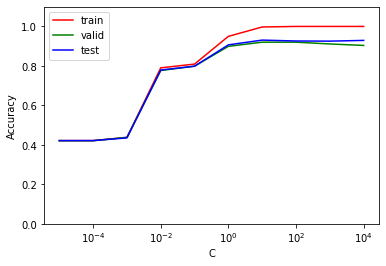

In [ ]:
# グラフ描画
import matplotlib.pyplot as plt

result = np.array(result).T
plt.plot(result[0], result[1], color="red", label="train")
plt.plot(result[0], result[2], color="green", label="valid")
plt.plot(result[0], result[3], color="blue", label="test")
plt.xscale ("log")
plt.ylim(0, 1.1)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##59. ハイパーパラメータの探索

In [ ]:
# optunaを用いた最適化
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.7 MB/s eta 0:00:00


In [ ]:
import optuna

# 最適化対象を関数で指定
def objective_model(trial):
  # チューニング対象パラメータのセット
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
  C = trial.suggest_loguniform("C", 1e-4, 1e4)

  # モデルの学習
  model = LogisticRegression(random_state=42,
                          penalty="elasticnet", # 正則化の種類
                          solver="saga",  # 最適化アルゴリズム
                          l1_ratio=l1_ratio, # L1正則化項の割合
                          C=C) # 正則化の強度
  model.fit(x_train, y_train)

  # 予測値の取得
  valid_pred = [np.max(model.predict_proba(x_valid), axis=1), model.predict(x_valid)]

  # 正解率の算出
  valid_accuracy = accuracy_score(y_valid, valid_pred[1])

  return valid_accuracy

In [ ]:
# 最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective_model, timeout=3600)

# 結果の表示
print("Best trial : ")
trial = study.best_trial  # best_valueを出したときの試行内容
print("  Value : {:.3f}".format(trial.value))
print("  Params : ")
for key, value in trial.params.items():
  print("    {} :  {}".format(key, value))

[I 2023-03-26 17:17:09,389] A new study created in memory with name: no-name-6fe6c875-d6dc-4cf6-b70a-a6a18de406bb
<ipython-input-62-e300e2e335b4>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
<ipython-input-62-e300e2e335b4>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform("C", 1e-4, 1e4)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2023-03-26 17:29:48,695] Trial 0 finished with value: 0.9145427286356822 and parameters: {'l1_ratio': 0.97

Best trial : 
  Value : 0.921
  Params : 
    l1_ratio :  0.005489334265566094
    C :  22.46157663679066


In [ ]:
# 探索したパラメータを用いて再学習
# パラメータの設定
l1_ratio = trial.params["l1_ratio"]
C = trial.params["C"]

# モデルの学習
model = LogisticRegression(random_state=42,
                        penalty="elasticnet",
                        solver="saga",
                        l1_ratio=l1_ratio,
                        C=C)
model.fit(x_train, y_train)

# 予測値の取得
train_pred = [np.max(model.predict_proba(x_train), axis=1), model.predict(x_train)]
valid_pred = [np.max(model.predict_proba(x_valid), axis=1), model.predict(x_valid)]
test_pred = [np.max(model.predict_proba(x_test), axis=1), model.predict(x_test)]

# 正解率の算出
train_accuracy = accuracy_score(y_train, train_pred[1])
valid_accuracy = accuracy_score(y_valid, valid_pred[1])
test_accuracy = accuracy_score(y_test, test_pred[1])

print("正解率（学習データ）：", '{:.3f}'.format(train_accuracy))
print("正解率（検証データ）：", '{:.3f}'.format(valid_accuracy))
print("正解率（評価データ）：", '{:.3f}'.format(test_accuracy))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


正解率（学習データ）： 0.999
正解率（検証データ）： 0.921
正解率（評価データ）： 0.930
